Иерархический кластерный анализ.
=============

Полезные ссылки:
* https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html
* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* http://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

Пример 1. Beverage
--------

In [2]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/1_beverage/")


In [3]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [4]:
#  Таблица pandas data frame
#  Данные + имена столбцов + имена строк

#  Все хорошо?

df.head()


,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [5]:
#  Все хорошо?
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP
numb.obs                                                           
1            1       0        0      0      1       1    0        1
2            1       0        0      0      1       0    0        0
3            1       0        0      0      1       0    0        0
4            0       1        0      1      0       0    1        0
5            1       0        0      0      1       0    0        0
6            1       0        0      0      1       1    0        0
7            0       1        1      1      0       0    1        0
8            1       1        0      0      1       1    0        1
9            1       1        0      0      0       1    1        1
10           1       0        0      0      1       0    0        1
11           1       0        0      0      1       1    0        0
12           0       1        0      0      0       0    1        0
13           0       0        1      1      0   

In [6]:
#  Выбор столбца таблицы в Pandas

print(df["COKE"])

numb.obs
1     1
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    1
20    1
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    0
33    1
34    0
Name: COKE, dtype: int64


In [7]:
#  Выбор элемента таблицы в Pandas

df["D_PEPSI"][3]

0

Вопрос.

Нужно ли стандартизовать данные?

Иерархический кластерный анализ проводится функцией linkage. 

Три аргумента этой команды: сами данные, метод вычисления расстояний между кластерами (```ward```, ```single```(default), ```complete```, ```average```, ```weighted```, ```centroid```, ```median```, ```weighted```) и метод вычисления расстояний между объектами (```euclidean``` (default), ```cityblock```, ```hamming```, ```cosine```). См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

дендрограмму строим ниже 

In [8]:
#  Нужны 3 процедуры
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(df, 'ward', 'euclidean')

В объекте ```link```  хранится информация об истории объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

In [9]:
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(33, 4)


In [10]:
link

#  Почему расстояния равны 0?

#  Чтобы просмотреть только первые 15 строк матрицы link
# link[:15]

array([[ 5.        , 10.        ,  0.        ,  2.        ],
       [ 1.        ,  2.        ,  0.        ,  2.        ],
       [ 4.        , 35.        ,  0.        ,  3.        ],
       [ 3.        , 22.        ,  0.        ,  2.        ],
       [20.        , 36.        ,  0.        ,  4.        ],
       [ 6.        , 33.        ,  0.        ,  2.        ],
       [ 9.        , 30.        ,  0.        ,  2.        ],
       [13.        , 28.        ,  0.        ,  2.        ],
       [32.        , 40.        ,  0.        ,  3.        ],
       [17.        , 23.        ,  0.        ,  2.        ],
       [11.        , 26.        ,  0.        ,  2.        ],
       [14.        , 29.        ,  0.        ,  2.        ],
       [25.        , 37.        ,  0.        ,  3.        ],
       [31.        , 45.        ,  0.        ,  3.        ],
       [21.        , 38.        ,  0.        ,  5.        ],
       [ 0.        ,  7.        ,  1.        ,  2.        ],
       [18.        , 27.

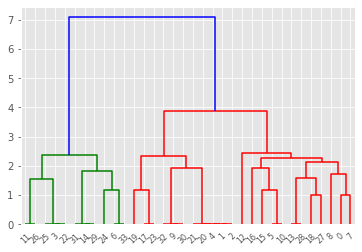

In [11]:
# Функция для построения дендрограммы. Вариант 1
#  Пороговое значение определяется примитивно, 
#  по формуле h = 0.7*max(Z[:,2]).
#  Самообман

dn = dendrogram(link)

Алгоритм подкрасил в дендрограмме два кластера, но я предпочитаю ответ три кластера. 

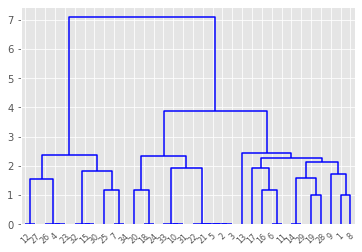

In [13]:
# Функция для построения дендрограммы. Вариант 2
#  Убираем автоматическое определение числа кластеров
dn = dendrogram(link, color_threshold = -1,                 
                # массив с названиями объектов для подписи по оси X
                labels=df.index.tolist())


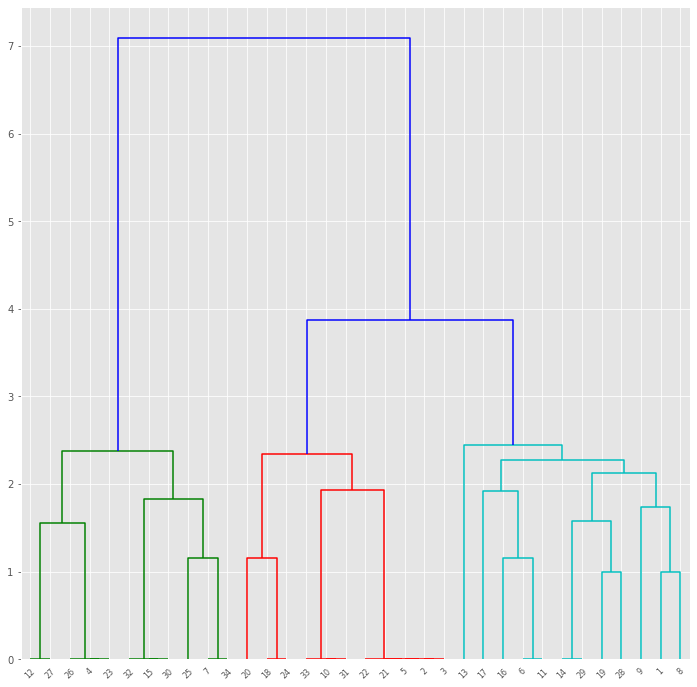

In [14]:
# Функция для построения дендрограммы. Вариант 3
#  Порог для расстояния = 3.2, цветом выделяются 3 кластера

fig = plt.figure(figsize=(12,12))

dn = dendrogram(link, color_threshold = 3.2, labels=df.index.tolist())

#  Еще варианты
#  dn = dendrogram(link, orientation = "right")
#  dn = dendrogram(link, labels= df.index.tolist())


Сначала добавим к таблице данных столбец ```cluster```, в который запишем номер того кластера, в который попал объект. Это сделаем с помощью функции ```fcluster```. В качестве первого аргумента передаём объект ```linkage```, полученный выше. Третьим аргументом ```criterion``` передаём критерий для разбиения на кластеры (```distance``` для остановки разбиения по расстоянию между кластерами и ```maxclust``` для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от значения аргумента ```criterion```.

In [15]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 3.1
df['cluster'] = fcluster(link, 3.1, criterion='distance')


# Останавливаем объединение, когда 3 кластера
#   df['cluster'] = fcluster(link, 3, criterion='maxclust')



In [17]:
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP  cluster
numb.obs                                                                    
1            1       0        0      0      1       1    0        1        3
2            1       0        0      0      1       0    0        0        2
3            1       0        0      0      1       0    0        0        2
4            0       1        0      1      0       0    1        0        1
5            1       0        0      0      1       0    0        0        2
6            1       0        0      0      1       1    0        0        3
7            0       1        1      1      0       0    1        0        1
8            1       1        0      0      1       1    0        1        3
9            1       1        0      0      0       1    1        1        3
10           1       0        0      0      1       0    0        1        2
11           1       0        0      0      1       1    0        0        3

Вопрос

На дендрограмме левый, центральный и правый кластеры

В таблице коды кластеров "1", "2" и "3"

Как соответствуют друг другу кластеры?

Посмотрим, по каким характеристикам различаются кластеры.

Для этого вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением функции к группам.

In [18]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


Два способа посчитать, сколько наблюдений попало в каждый кластер. 


In [19]:
#  1 вариант. Применяем вызов ```groupy```, затем метод ```size```.
df.groupby('cluster').size()

cluster
1    11
2    11
3    12
dtype: int64

In [20]:
#  2 вариант. Другой способ - сколько раз встретилось значение?
print(df['cluster'].value_counts())

3    12
2    11
1    11
Name: cluster, dtype: int64


In [21]:
#  Какие наблюдения попали в 1-й кластер?
df[df['cluster']==1].index.values


array([ 4,  7, 12, 15, 23, 25, 26, 27, 30, 32, 34], dtype=int64)

Что изменится, если выберем вариант решения с 2 кластерами?

**Каменистая осыпь, она же локоть**

График, помогающий определить число кластеров. Особенно полезен, если данных много. 
Будем использовать второй столбец матрицы ```link``` где  хранятся расстояния между парами объединяемых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [22]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.15470054, 1.15470054, 1.15470054,
       1.54919334, 1.58113883, 1.73205081, 1.82574186, 1.91485422,
       1.93649167, 2.12132034, 2.27636073, 2.33711814, 2.37920282,
       2.446395  , 3.87646865, 7.09212963])

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага слияния (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0,0.5,'Distance')

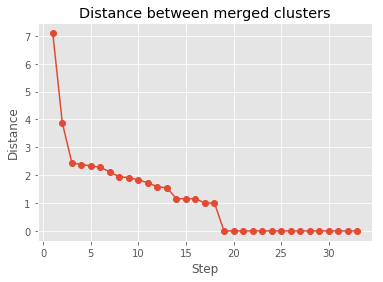

In [23]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

Text(22,2.6,'4 clusters')

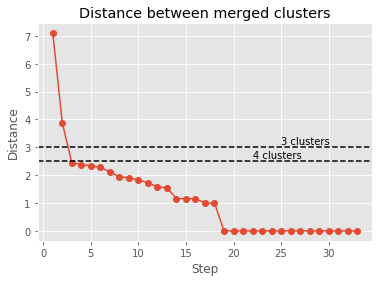

In [24]:
#  Добавляем уровни, на которых останавливаем объединение

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

Из картинки видно, что если мы остановим объединение кластеров при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3.1 -- 3 кластера.

В случае больших данных график стоит модифицировать. Рекомендуется показывать на графике не все слияния, а только несколько последних. 

Чтобы автоматизировать процесс, факт сильного изменения расстояний между кластерами можно фиксировать с помощью "производной": там где график выходит на горизонталь, "производная" станет почти нулём.

Пример 2. Кластеризация претендентов.
----------------------

In [3]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent")

In [4]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [5]:
# В колонке NR находится номер объекта, 
# его нужно исключить из данных для кластеризации
del df['NR']

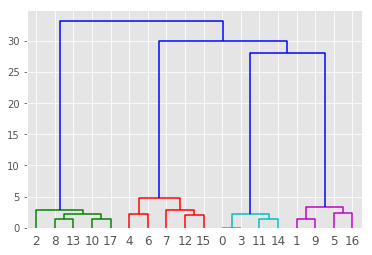

In [27]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, color_threshold = -1)

In [ ]:
#  Еще вариант - зачем? 
#  dn = dendrogram(link, link_color_func=lambda x: "black")

Вывод: число кластеров равно 4. 
Переходим к интерпретации кластеров

In [28]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [29]:
#  Средние значения характеристик в каждом кластере
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Пример 3. Потребление протеинов в Европе.
------------------

In [16]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/3_Protein Consumption in Europe")


In [17]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Стандартизация данных
--------------------
В этом примере данные измерены в одной шкале, в одних и тех же единицах, но значения в разных столбцах различаются почти на два порядка.

Вывод: данные надо стандартизировать. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть чуть более лёгкие методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но для supervized задач машинного обучения, которые встретяся позже, удобнее использовать именно рассматриваемый вариант.

Процесс стандартизации выглядит так:

In [18]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации

stand_1 = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_1.fit(df)
# преобразуем данные
X = stand_1.transform(df)
# Получаем объект X -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [19]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


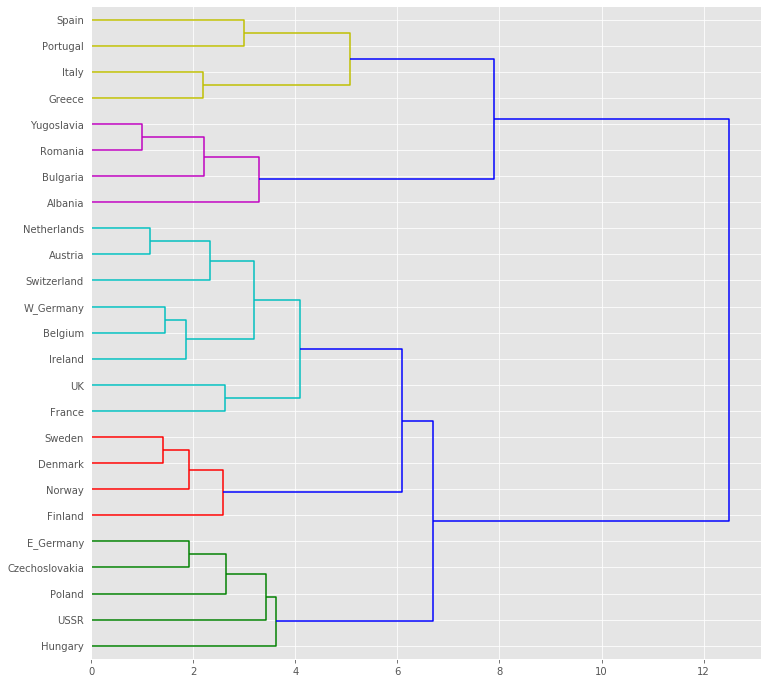

In [20]:
#  Строим дендрограмму

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

Обратите внимание, как подписывать имена объектов

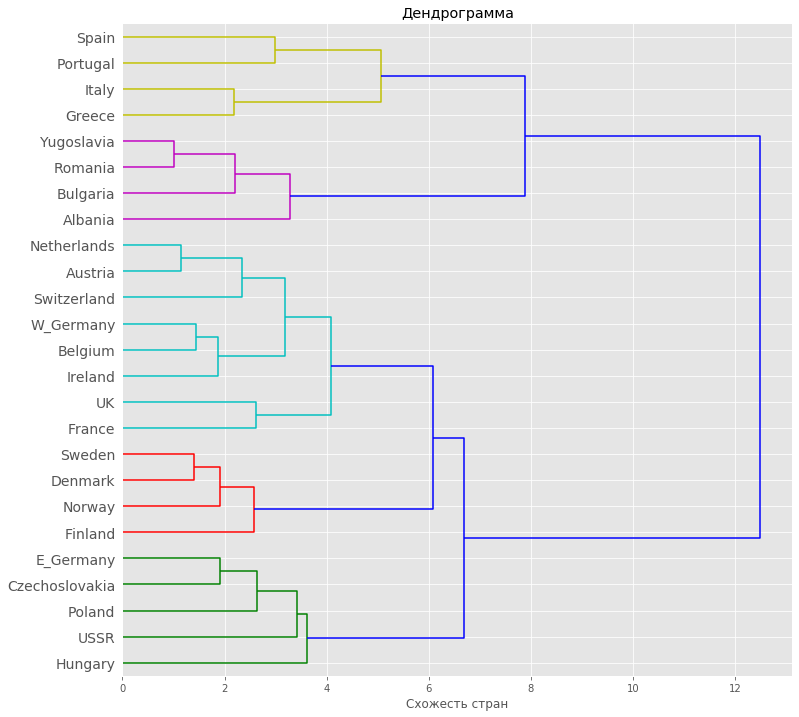

In [28]:
#  Изменим размер подписей объектов

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 14, 
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

In [46]:
df['cluster'] = fcluster(link, 5.5, criterion='distance')

In [47]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
5,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075


In [48]:
#  Какие страны попали в 5-й кластер?
df[df['cluster']==5].index.values

array(['Greece', 'Italy', 'Portugal', 'Spain'], dtype=object)

In [49]:
#  Какие страны попали в 4-й кластер?
df[df['cluster']==4].index.values

array(['Albania', 'Bulgaria', 'Romania', 'Yugoslavia'], dtype=object)

In [50]:
#  Надоело, выводим состав кластеров сразу для всей выборки
df['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

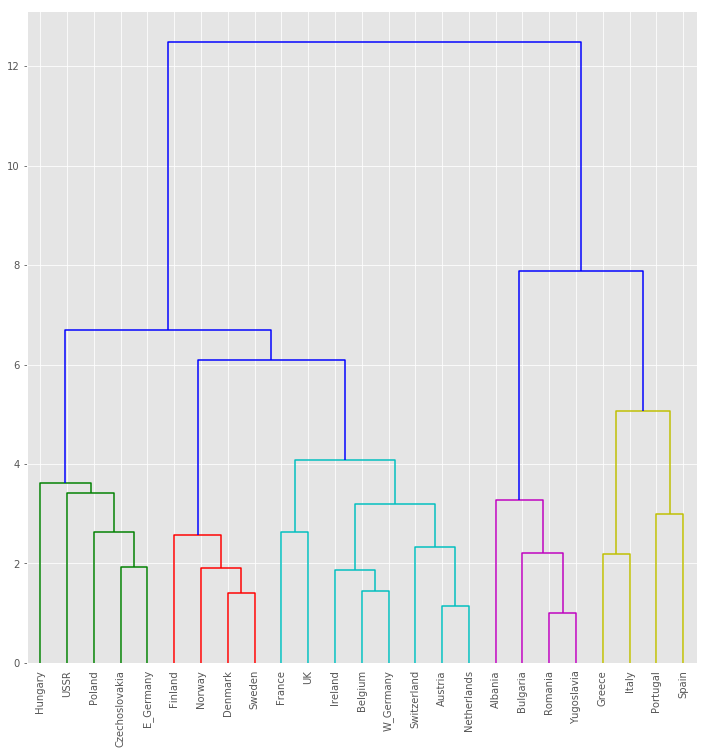

In [35]:
#   Можно, конечно строить дендрограмму и так...

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для сокращения слишком ветввистой дендрограммы
                # сейчас не работает, так как по умолчанию  p=30
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                leaf_rotation=90.)